# NN - EDP Solver

Inspiré de : https://www.cs.uoi.gr/~lagaris/papers/TNN-LLF.pdf

dy/dt = -1/5 y  + exp(-t/5)*cos(t) dy/dt = f(t,y(t)) avec y(0)=0 \
Solution analytique : y(t) = exp(-t/5)*sin(t)

y_trial = A + xN(x,U) avec A = y(0)=0

In [100]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import time
from torchvision import torch

In [20]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x)*(1-sigmoid(x))

In [80]:
def neural_network(x,weights,bias):
    s_z=sigmoid(torch.matmul(x,weights[0])+bias[0])
    return torch.matmul(s_z,weights[1]+bias[1])

def dN_dx(weights,x):
    s_z_grad = sigmoid_grad(torch.matmul(x,weights[0])+bias[0])
    mul = torch.mul(weights[0].T,weights[1])
    return torch.matmul(s_z_grad,mul)

In [81]:
# Init weights et bias
weights = [torch.randn((1,10), requires_grad=True),torch.randn((10,1), requires_grad=True)]
bias = [torch.randn(10, requires_grad=True),torch.randn(1, requires_grad=True)]

In [82]:
A = 0 # initial condition
Psi_t = lambda x: A+x * neural_network(x,weights,bias)

In [83]:
f = lambda x, Psi : torch.exp(-x/5.0) * torch.cos(x) - Psi/5.0

In [92]:
def error(x):
    x.requires_grad = True
    psi = Psi_t(x)
    ddN = dN_dx(weights,x)
    Psi_t_x =  neural_network(x,weights,bias) +  x* ddN
    return torch.mean( (Psi_t_x - f(x,psi) )**2 )

In [105]:
epochs = 5000
lr=0.01
x=torch.Tensor(np.linspace(0,5,100)[:,None])
for i in range(epochs):
    loss = error(x)
    loss.backward()
    weights[0].data -= lr*weights[0].grad.data
    weights[1].data -= lr*weights[1].grad.data
    
    bias[0].data -= lr*bias[0].grad.data
    bias[1].data -= lr*bias[1].grad.data
    
    weights[0].grad.zero_()
    weights[1].grad.zero_()
    bias[0].grad.zero_()
    bias[1].grad.zero_()
    
    print("Loss : ", loss.item())

Loss :  0.005420716013759375
Loss :  0.005419638939201832
Loss :  0.005418551620095968
Loss :  0.005417466629296541
Loss :  0.005416386295109987
Loss :  0.005415297579020262
Loss :  0.005414217710494995
Loss :  0.0054131364449858665
Loss :  0.005412050057202578
Loss :  0.0054109664633870125
Loss :  0.005409883335232735
Loss :  0.005408791825175285
Loss :  0.005407714284956455
Loss :  0.005406629294157028
Loss :  0.0054055494256317616
Loss :  0.00540446862578392
Loss :  0.005403390619903803
Loss :  0.005402309820055962
Loss :  0.005401225760579109
Loss :  0.005400142632424831
Loss :  0.005399064626544714
Loss :  0.005397983361035585
Loss :  0.005396910477429628
Loss :  0.005395829677581787
Loss :  0.005394753068685532
Loss :  0.005393671337515116
Loss :  0.005392593797296286
Loss :  0.005391514860093594
Loss :  0.005390433594584465
Loss :  0.005389356054365635
Loss :  0.005388279445469379
Loss :  0.005387203302234411
Loss :  0.005386123433709145
Loss :  0.005385046824812889
Loss :  0.00

Loss :  0.004992939066141844
Loss :  0.004991966299712658
Loss :  0.004991001449525356
Loss :  0.004990035202354193
Loss :  0.0049890680238604546
Loss :  0.004988104570657015
Loss :  0.0049871355295181274
Loss :  0.004986171144992113
Loss :  0.0049852030351758
Loss :  0.004984232597053051
Loss :  0.004983262624591589
Loss :  0.004982303828001022
Loss :  0.004981339443475008
Loss :  0.004980375058948994
Loss :  0.004979409743100405
Loss :  0.00497844023630023
Loss :  0.00497747678309679
Loss :  0.0049765147268772125
Loss :  0.004975545220077038
Loss :  0.004974577575922012
Loss :  0.004973619244992733
Loss :  0.004972649738192558
Loss :  0.004971691407263279
Loss :  0.004970730748027563
Loss :  0.00496976962313056
Loss :  0.004968809429556131
Loss :  0.004967845976352692
Loss :  0.0049668909050524235
Loss :  0.00496592978015542
Loss :  0.00496496120467782
Loss :  0.004964004270732403
Loss :  0.0049630459398031235
Loss :  0.00496207969263196
Loss :  0.004961118567734957
Loss :  0.0049601

Loss :  0.00462572555989027
Loss :  0.004624851513653994
Loss :  0.004623983055353165
Loss :  0.004623113200068474
Loss :  0.0046222456730902195
Loss :  0.0046213786117732525
Loss :  0.004620504565536976
Loss :  0.004619638901203871
Loss :  0.0046187774278223515
Loss :  0.004617907106876373
Loss :  0.004617040045559406
Loss :  0.004616166464984417
Loss :  0.004615305457264185
Loss :  0.004614442121237516
Loss :  0.004613577853888273
Loss :  0.00461271358653903
Loss :  0.004611841402947903
Loss :  0.004610979929566383
Loss :  0.004610108211636543
Loss :  0.004609246738255024
Loss :  0.004608380142599344
Loss :  0.004607519134879112
Loss :  0.004606649279594421
Loss :  0.004605784546583891
Loss :  0.004604922607541084
Loss :  0.004604057874530554
Loss :  0.004603193141520023
Loss :  0.0046023293398320675
Loss :  0.0046014683321118355
Loss :  0.004600600339472294
Loss :  0.004599740728735924
Loss :  0.0045988792553544044
Loss :  0.004598014522343874
Loss :  0.00459715211763978
Loss :  0.0

Loss :  0.004285597708076239
Loss :  0.004284821450710297
Loss :  0.004284043796360493
Loss :  0.004283264745026827
Loss :  0.004282483831048012
Loss :  0.00428170757368207
Loss :  0.004280935041606426
Loss :  0.0042801531963050365
Loss :  0.004279377870261669
Loss :  0.004278599284589291
Loss :  0.004277817439287901
Loss :  0.004277042578905821
Loss :  0.00427626445889473
Loss :  0.004275485407561064
Loss :  0.004274706356227398
Loss :  0.004273931495845318
Loss :  0.004273155704140663
Loss :  0.004272384103387594
Loss :  0.004271607846021652
Loss :  0.0042708320543169975
Loss :  0.004270064644515514
Loss :  0.00426928885281086
Loss :  0.0042685107327997684
Loss :  0.004267738666385412
Loss :  0.004266959615051746
Loss :  0.004266181029379368
Loss :  0.004265406634658575
Loss :  0.004264636430889368
Loss :  0.004263859707862139
Loss :  0.004263084381818771
Loss :  0.004262309521436691
Loss :  0.004261540714651346
Loss :  0.004260762594640255
Loss :  0.004259990993887186
Loss :  0.0042

Loss :  0.004032759461551905
Loss :  0.004032052122056484
Loss :  0.0040313368663191795
Loss :  0.004030620213598013
Loss :  0.00402991333976388
Loss :  0.004029198084026575
Loss :  0.004028483293950558
Loss :  0.004027775023132563
Loss :  0.004027060233056545
Loss :  0.004026349633932114
Loss :  0.004025640431791544
Loss :  0.004024922382086515
Loss :  0.004024206660687923
Loss :  0.004023498855531216
Loss :  0.004022789187729359
Loss :  0.004022079519927502
Loss :  0.004021369386464357
Loss :  0.004020658787339926
Loss :  0.004019947722554207
Loss :  0.004019234329462051
Loss :  0.004018527455627918
Loss :  0.004017815925180912
Loss :  0.00401710532605648
Loss :  0.004016397520899773
Loss :  0.004015687853097916
Loss :  0.004014977719634771
Loss :  0.004014268051832914
Loss :  0.004013559781014919
Loss :  0.004012856632471085
Loss :  0.004012145102024078
Loss :  0.004011435434222221
Loss :  0.004010728560388088
Loss :  0.004010026343166828
Loss :  0.004009317606687546
Loss :  0.00400

Loss :  0.003772549331188202
Loss :  0.0037719067186117172
Loss :  0.003771260380744934
Loss :  0.0037706121802330017
Loss :  0.0037699618842452765
Loss :  0.0037693213671445847
Loss :  0.0037686771247535944
Loss :  0.003768036374822259
Loss :  0.003767387242987752
Loss :  0.0037667423021048307
Loss :  0.0037660920061171055
Loss :  0.0037654549814760685
Loss :  0.0037648105062544346
Loss :  0.0037641606759279966
Loss :  0.0037635189946740866
Loss :  0.003762877080589533
Loss :  0.003762230509892106
Loss :  0.003761585336178541
Loss :  0.0037609392311424017
Loss :  0.003760297317057848
Loss :  0.0037596558686345816
Loss :  0.0037590127903968096
Loss :  0.0037583676166832447
Loss :  0.003757719649001956
Loss :  0.0037570807617157698
Loss :  0.0037564393132925034
Loss :  0.0037557953037321568
Loss :  0.0037551550194621086
Loss :  0.003754513803869486
Loss :  0.0037538730539381504
Loss :  0.003753226948902011
Loss :  0.003752589924260974
Loss :  0.0037519477773457766
Loss :  0.003751299344

Loss :  0.0035394122824072838
Loss :  0.0035388260148465633
Loss :  0.003538240445777774
Loss :  0.003537653712555766
Loss :  0.0035370630212128162
Loss :  0.003536473261192441
Loss :  0.0035358869936317205
Loss :  0.0035353025887161493
Loss :  0.0035347153898328543
Loss :  0.0035341265611350536
Loss :  0.003533544484525919
Loss :  0.0035329554229974747
Loss :  0.0035323670599609613
Loss :  0.003531781490892172
Loss :  0.003531195456162095
Loss :  0.0035306112840771675
Loss :  0.0035300273448228836
Loss :  0.003529437817633152
Loss :  0.0035288501530885696
Loss :  0.003528264816850424
Loss :  0.003527682041749358
Loss :  0.0035270939115434885
Loss :  0.003526512999087572
Loss :  0.003525931853801012
Loss :  0.003525347914546728
Loss :  0.0035247611813247204
Loss :  0.003524178173393011
Loss :  0.003523588879033923
Loss :  0.003523009829223156
Loss :  0.00352242449298501
Loss :  0.003521840088069439
Loss :  0.003521256847307086
Loss :  0.003520673606544733
Loss :  0.003520093858242035
L

Loss :  0.0033422443084418774
Loss :  0.0033417034428566694
Loss :  0.0033411614131182432
Loss :  0.00334062147885561
Loss :  0.003340084571391344
Loss :  0.003339545801281929
Loss :  0.0033390040043741465
Loss :  0.003338464768603444
Loss :  0.0033379229716956615
Loss :  0.0033373874612152576
Loss :  0.0033368519507348537
Loss :  0.003336311550810933
Loss :  0.0033357732463628054
Loss :  0.0033352377358824015
Loss :  0.00333469919860363
Loss :  0.00333415693603456
Loss :  0.0033336214255541563
Loss :  0.0033330877777189016
Loss :  0.003332553431391716
Loss :  0.0033320127986371517
Loss :  0.0033314740285277367
Loss :  0.003330938285216689
Loss :  0.0033304018434137106
Loss :  0.0033298658672720194
Loss :  0.003329329192638397
Loss :  0.0033287927508354187
Loss :  0.0033282542135566473
Loss :  0.003327717771753669
Loss :  0.0033271843567490578
Loss :  0.0033266476821154356
Loss :  0.003326111938804388
Loss :  0.0033255743328481913
Loss :  0.003325039055198431
Loss :  0.0033245040103793

Loss :  0.003128643613308668
Loss :  0.0031281583942472935
Loss :  0.0031276685185730457
Loss :  0.0031271809712052345
Loss :  0.003126695053651929
Loss :  0.003126205876469612
Loss :  0.003125719493255019
Loss :  0.0031252342741936445
Loss :  0.0031247471924871206
Loss :  0.0031242624390870333
Loss :  0.003123773727566004
Loss :  0.003123283153399825
Loss :  0.003122796770185232
Loss :  0.003122307127341628
Loss :  0.0031218237709254026
Loss :  0.0031213369220495224
Loss :  0.003120846813544631
Loss :  0.003120359731838107
Loss :  0.0031198719516396523
Loss :  0.0031193874310702085
Loss :  0.0031188982538878918
Loss :  0.0031184128019958735
Loss :  0.003117929445579648
Loss :  0.0031174435280263424
Loss :  0.003116953419521451
Loss :  0.0031164679676294327
Loss :  0.0031159829813987017
Loss :  0.003115505212917924
Loss :  0.0031150183640420437
Loss :  0.003114533144980669
Loss :  0.003114046761766076
Loss :  0.003113562474027276
Loss :  0.0031130779534578323
Loss :  0.0031125941313803

Loss :  0.0029310151003301144
Loss :  0.002930574119091034
Loss :  0.002930131508037448
Loss :  0.0029296893626451492
Loss :  0.0029292465187609196
Loss :  0.002928804373368621
Loss :  0.002928363159298897
Loss :  0.002927918918430805
Loss :  0.0029274746775627136
Loss :  0.0029270348604768515
Loss :  0.002926592482253909
Loss :  0.002926149871200323
Loss :  0.0029257081914693117
Loss :  0.0029252662789076567
Loss :  0.0029248276259750128
Loss :  0.0029243857134133577
Loss :  0.00292394426651299
Loss :  0.002923505613580346
Loss :  0.0029230641666799784
Loss :  0.0029226187616586685
Loss :  0.002922182669863105
Loss :  0.0029217416886240244
Loss :  0.0029213058296591043
Loss :  0.002920860657468438
Loss :  0.002920424332842231
Loss :  0.002919980324804783
Loss :  0.0029195398092269897
Loss :  0.002919101621955633
Loss :  0.0029186587780714035
Loss :  0.0029182229191064835
Loss :  0.002917775884270668
Loss :  0.002917340025305748
Loss :  0.0029168990440666676
Loss :  0.00291645945981144

Loss :  0.0027605032082647085
Loss :  0.0027600962202996016
Loss :  0.002759692957624793
Loss :  0.002759286668151617
Loss :  0.002758885035291314
Loss :  0.0027584796771407127
Loss :  0.002758079208433628
Loss :  0.002757672918960452
Loss :  0.0027572670951485634
Loss :  0.0027568615041673183
Loss :  0.002756462898105383
Loss :  0.002756059169769287
Loss :  0.002755657536908984
Loss :  0.0027552531100809574
Loss :  0.0027548486832529306
Loss :  0.0027544451877474785
Loss :  0.0027540400624275208
Loss :  0.0027536412235349417
Loss :  0.002753236796706915
Loss :  0.0027528363279998302
Loss :  0.0027524337638169527
Loss :  0.002752036089077592
Loss :  0.0027516328264027834
Loss :  0.0027512304950505495
Loss :  0.0027508269995450974
Loss :  0.002750423038378358
Loss :  0.0027500202413648367
Loss :  0.00274961837567389
Loss :  0.00274921883828938
Loss :  0.002748817205429077
Loss :  0.002748410450294614
Loss :  0.002748007420450449
Loss :  0.002747607883065939
Loss :  0.0027472050860524178

Loss :  0.0025878732558339834
Loss :  0.0025875060819089413
Loss :  0.002587138209491968
Loss :  0.002586771035566926
Loss :  0.002586401766166091
Loss :  0.0025860366877168417
Loss :  0.0025856727734208107
Loss :  0.0025853023398667574
Loss :  0.0025849323719739914
Loss :  0.0025845682248473167
Loss :  0.0025842017494142056
Loss :  0.0025838369037956
Loss :  0.0025834711268544197
Loss :  0.002583104418590665
Loss :  0.0025827360805124044
Loss :  0.002582368440926075
Loss :  0.0025820049922913313
Loss :  0.002581639215350151
Loss :  0.0025812783278524876
Loss :  0.0025809132494032383
Loss :  0.002580542815849185
Loss :  0.0025801793672144413
Loss :  0.002579811727628112
Loss :  0.0025794487446546555
Loss :  0.0025790822692215443
Loss :  0.002578719286248088
Loss :  0.0025783514138311148
Loss :  0.0025779902935028076
Loss :  0.0025776242837309837
Loss :  0.002577258739620447
Loss :  0.002576893661171198
Loss :  0.0025765299797058105
Loss :  0.002576165832579136
Loss :  0.002575804013758

Loss :  0.002439921721816063
Loss :  0.002439587377011776
Loss :  0.002439253032207489
Loss :  0.0024389137979596853
Loss :  0.002438579685986042
Loss :  0.0024382411502301693
Loss :  0.002437904244288802
Loss :  0.002437568735331297
Loss :  0.002437231596559286
Loss :  0.0024368984159082174
Loss :  0.0024365652352571487
Loss :  0.002436226699501276
Loss :  0.0024358893278986216
Loss :  0.0024355524219572544
Loss :  0.002435221802443266
Loss :  0.0024348862934857607
Loss :  0.0024345514830201864
Loss :  0.002434217371046543
Loss :  0.002433880465105176
Loss :  0.0024335472844541073
Loss :  0.002433210611343384
Loss :  0.002432876266539097
Loss :  0.0024325463455170393
Loss :  0.002432209439575672
Loss :  0.002431877190247178
Loss :  0.002431540284305811
Loss :  0.002431202447041869
Loss :  0.0024308711290359497
Loss :  0.0024305330589413643
Loss :  0.002430198946967721
Loss :  0.002429865300655365
Loss :  0.00242953235283494
Loss :  0.0024291956797242165
Loss :  0.0024288613349199295
L

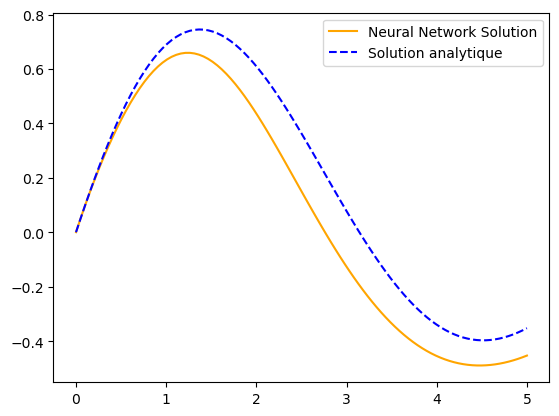

In [106]:
x = torch.unsqueeze(torch.linspace(0,5,100), dim=1)
y=torch.exp(-(x/5))*torch.sin(x)
psi_trial =Psi_t(x)
fig,ax = plt.subplots()
ax.plot(x.data.numpy(), psi_trial.data.numpy(), 'orange', label='Neural Network Solution')
ax.plot(x.data.numpy(), y.data.numpy(), 'b--', label='Solution analytique')

plt.legend()